# Time Series Analysis with Billboard Hot 100 Song

#### Updated October 2006- December 31st 2023

## Contents

### 1. Importing libraries and data
### 2. Cleaning, wrangling, and subsetting time-series data
### 3. Time series analysis: decomposition 
### 4. Testing for stationarity
### 5. Stationarizing 
### 6. Forecasting with ARIMA

# 01. Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import os
import warnings 

warnings.filterwarnings("ignore") 
plt.style.use('fivethirtyeight') 

In [2]:
# create path

path = r"C:\Users\leobs\OneDrive\Desktop\LF_TS_Analysis"

In [3]:
# Importing Billboard Hot 100 songs df
# Since this df only contains Taylor songs, may need to address skipped
# dates when she didn't have any charts in order to fill Nan values

df = pd.read_csv(os.path.join(path, '02 Manipulated data', '01 Final DataFrames', 'final_bill_hot_songs.csv'), index_col = 0)


# 02. Cleaning, wrangling, and subsetting time-series data

In [4]:
df.head()

,chart_week,chart_position,song_title,artist,prior_wk_position,peak_pos,wks_on_chart,alb_title,song_r_date,track,...,wk1_alb_sales,top_alb_count,top_alb_normal,alb_track_cnt,tvflag,sales_group,tot_streams_group,alb_genre,song_cluster_num,song_cluster_color
0,7/27/2013,65.0,22,Taylor Swift,55.0,20.0,20.0,Red (Deluxe Edition),10/22/2012,6.0,...,1208000.0,185.0,0.045849,22.0,False,High first week sales,High total streams,Pop rock,3,yellow
1,7/20/2013,55.0,22,Taylor Swift,49.0,20.0,19.0,Red (Deluxe Edition),10/22/2012,6.0,...,1208000.0,185.0,0.045849,22.0,False,High first week sales,High total streams,Pop rock,3,yellow
2,7/13/2013,49.0,22,Taylor Swift,41.0,20.0,18.0,Red (Deluxe Edition),10/22/2012,6.0,...,1208000.0,185.0,0.045849,22.0,False,High first week sales,High total streams,Pop rock,3,yellow
3,7/6/2013,41.0,22,Taylor Swift,32.0,20.0,17.0,Red (Deluxe Edition),10/22/2012,6.0,...,1208000.0,185.0,0.045849,22.0,False,High first week sales,High total streams,Pop rock,3,yellow
4,6/29/2013,32.0,22,Taylor Swift,26.0,20.0,16.0,Red (Deluxe Edition),10/22/2012,6.0,...,1208000.0,185.0,0.045849,22.0,False,High first week sales,High total streams,Pop rock,3,yellow


In [5]:
df.tail(20)

,chart_week,chart_position,song_title,artist,prior_wk_position,peak_pos,wks_on_chart,alb_title,song_r_date,track,...,wk1_alb_sales,top_alb_count,top_alb_normal,alb_track_cnt,tvflag,sales_group,tot_streams_group,alb_genre,song_cluster_num,song_cluster_color
1426,8/24/2019,18.0,You Need To Calm Down,Taylor Swift,18.0,2.0,9.0,Lover,8/23/2019,14.0,...,679000.0,219.0,0.142300,18.0,False,Medium first week sales,High total streams,Synth/Dream/Dance pop,1,orange
1427,8/17/2019,18.0,You Need To Calm Down,Taylor Swift,16.0,2.0,8.0,Lover,8/23/2019,14.0,...,679000.0,219.0,0.142300,18.0,False,Medium first week sales,High total streams,Synth/Dream/Dance pop,1,orange
1428,8/10/2019,16.0,You Need To Calm Down,Taylor Swift,15.0,2.0,7.0,Lover,8/23/2019,14.0,...,679000.0,219.0,0.142300,18.0,False,Medium first week sales,High total streams,Synth/Dream/Dance pop,1,orange
1429,8/3/2019,15.0,You Need To Calm Down,Taylor Swift,15.0,2.0,6.0,Lover,8/23/2019,14.0,...,679000.0,219.0,0.142300,18.0,False,Medium first week sales,High total streams,Synth/Dream/Dance pop,1,orange
1430,7/27/2019,15.0,You Need To Calm Down,Taylor Swift,16.0,2.0,5.0,Lover,8/23/2019,14.0,...,679000.0,219.0,0.142300,18.0,False,Medium first week sales,High total streams,Synth/Dream/Dance pop,1,orange
1431,7/20/2019,16.0,You Need To Calm Down,Taylor Swift,13.0,2.0,4.0,Lover,8/23/2019,14.0,...,679000.0,219.0,0.142300,18.0,False,Medium first week sales,High total streams,Synth/Dream/Dance pop,1,orange
1432,7/13/2019,13.0,You Need To Calm Down,Taylor Swift,13.0,2.0,3.0,Lover,8/23/2019,14.0,...,679000.0,219.0,0.142300,18.0,False,Medium first week sales,High total streams,Synth/Dream/Dance pop,1,orange
1433,7/6/2019,13.0,You Need To Calm Down,Taylor Swift,2.0,2.0,2.0,Lover,8/23/2019,14.0,...,679000.0,219.0,0.142300,18.0,False,Medium first week sales,High total streams,Synth/Dream/Dance pop,1,orange
1434,6/29/2019,2.0,You Need To Calm Down,Taylor Swift,0.0,2.0,1.0,Lover,8/23/2019,14.0,...,679000.0,219.0,0.142300,18.0,False,Medium first week sales,High total streams,Synth/Dream/Dance pop,1,orange
1435,4/4/2009,95.0,You're Not Sorry,Taylor Swift,40.0,11.0,5.0,Fearless Platinum Edition,11/11/2008,15.0,...,592300.0,261.0,0.047663,19.0,False,Medium first week sales,High total streams,Country pop,3,yellow


In [6]:
df.shape

(1446, 50)

In [7]:
# Check columns, dtypes, and counts

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1446 entries, 0 to 1445
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   chart_week          1446 non-null   object 
 1   chart_position      1446 non-null   float64
 2   song_title          1446 non-null   object 
 3   artist              1446 non-null   object 
 4   prior_wk_position   1446 non-null   float64
 5   peak_pos            1446 non-null   float64
 6   wks_on_chart        1446 non-null   float64
 7   alb_title           1446 non-null   object 
 8   song_r_date         1446 non-null   object 
 9   track               1446 non-null   float64
 10  acou                1446 non-null   float64
 11  dance               1446 non-null   float64
 12  ener                1446 non-null   float64
 13  instru              1446 non-null   float64
 14  live                1446 non-null   float64
 15  loud                1446 non-null   float64
 16  speech     

In [8]:
df['chart_week'].value_counts(dropna=False) # Does not include any weeks with 0 hits

chart_week
11/27/2021    26
7/22/2023     25
11/11/2023    22
11/5/2022     20
11/12/2022    20
              ..
5/21/2011      1
5/14/2011      1
5/7/2011       1
4/30/2011      1
9/5/2009       1
Name: count, Length: 630, dtype: int64

In [9]:
# Get all the unique values in the chart week columns

unique_weeks = df['chart_week'].unique()

In [10]:
# Count the number of unique weeks 

number_chart_weeks = len(unique_weeks)

print("Unique Values", unique_weeks)
print("Number of Chart Weeks", number_chart_weeks)

Unique Values ['7/27/2013' '7/20/2013' '7/13/2013' '7/6/2013' '6/29/2013' '6/22/2013'
 '6/15/2013' '6/8/2013' '6/1/2013' '5/25/2013' '5/18/2013' '5/11/2013'
 '5/4/2013' '4/27/2013' '4/20/2013' '4/13/2013' '4/6/2013' '3/30/2013'
 '1/12/2013' '11/10/2012' '12/9/2023' '12/2/2023' '11/25/2023'
 '11/18/2023' '11/11/2023' '1/27/2018' '1/20/2018' '1/13/2018' '1/6/2018'
 '12/30/2017' '12/23/2017' '12/16/2017' '12/9/2017' '12/2/2017'
 '11/25/2017' '11/18/2017' '11/11/2017' '11/4/2017' '10/28/2017'
 '10/21/2017' '10/14/2017' '10/7/2017' '9/30/2017' '9/23/2017'
 '11/27/2021' '1/2/2021' '12/26/2020' '9/7/2019' '3/5/2022' '2/26/2022'
 '2/19/2022' '2/12/2022' '2/5/2022' '1/29/2022' '1/22/2022' '1/15/2022'
 '1/8/2022' '1/1/2022' '12/25/2021' '12/18/2021' '12/11/2021' '12/4/2021'
 '11/4/2023' '10/28/2023' '10/21/2023' '10/14/2023' '10/7/2023'
 '9/30/2023' '9/23/2023' '9/16/2023' '9/9/2023' '9/2/2023' '8/26/2023'
 '8/19/2023' '8/12/2023' '8/5/2023' '7/29/2023' '7/22/2023' '7/15/2023'
 '7/8/2023' '7/1/2

There are 630 unique chart weeks in this data frame, ranging from 2006 through 2023. 

In [11]:
df.isnull().sum()

chart_week            0
chart_position        0
song_title            0
artist                0
prior_wk_position     0
peak_pos              0
wks_on_chart          0
alb_title             0
song_r_date           0
track                 0
acou                  0
dance                 0
ener                  0
instru                0
live                  0
loud                  0
speech                0
temp                  0
val                   0
pop                   0
dur                   0
alb_id                0
song_id               0
days                  0
tot_streams           0
last_stream_update    0
avg_daily_streams     0
top_song              0
top_song_flag         0
top_s_cnt             0
record_type           0
alb_num               0
alb_ann_mo            0
alb_ann_day           0
alb_ann_yr            0
alb_ann_date          0
alb_r_mo              0
alb_r_day             0
alb_r_yr              0
alb_r_date            0
wk1_alb_sales         0
top_alb_count   

In [12]:
df.columns

Index(['chart_week', 'chart_position', 'song_title', 'artist',
       'prior_wk_position', 'peak_pos', 'wks_on_chart', 'alb_title',
       'song_r_date', 'track', 'acou', 'dance', 'ener', 'instru', 'live',
       'loud', 'speech', 'temp', 'val', 'pop', 'dur', 'alb_id', 'song_id',
       'days', 'tot_streams', 'last_stream_update', 'avg_daily_streams',
       'top_song', 'top_song_flag', 'top_s_cnt', 'record_type', 'alb_num',
       'alb_ann_mo', 'alb_ann_day', 'alb_ann_yr', 'alb_ann_date', 'alb_r_mo',
       'alb_r_day', 'alb_r_yr', 'alb_r_date', 'wk1_alb_sales', 'top_alb_count',
       'top_alb_normal', 'alb_track_cnt', 'tvflag', 'sales_group',
       'tot_streams_group', 'alb_genre', 'song_cluster_num',
       'song_cluster_color'],
      dtype='object')

In [13]:
# Remove columns not needed for analysis
# Do not need song features, will isolate 

df.drop(columns=['chart_position','artist','prior_wk_position', 
                 'peak_pos', 'wks_on_chart', 'alb_title',
               'song_r_date', 'track', 'acou', 'dance', 'ener', 
                 'instru', 'live',  'loud', 'speech', 'temp', 'val', 'pop', 'dur', 'song_id',
                   'days', 'tot_streams', 'last_stream_update', 'avg_daily_streams',
                   'top_song', 'top_song_flag', 'top_s_cnt', 'record_type', 'alb_num',
                   'alb_ann_mo', 'alb_ann_day', 'alb_ann_yr', 'alb_ann_date', 'alb_r_mo',
                   'alb_r_day', 'alb_r_yr', 'alb_r_date', 'wk1_alb_sales', 'top_alb_count',
                   'top_alb_normal', 'alb_track_cnt', 'tvflag', 'sales_group',
                   'tot_streams_group', 'alb_genre', 'song_cluster_num',
                   'song_cluster_color'], axis=1, inplace=True)

In [14]:
df.columns

Index(['chart_week', 'song_title', 'alb_id'], dtype='object')

In [15]:
df.shape

(1446, 3)

In [16]:
df.head()

,chart_week,song_title,alb_id
0,7/27/2013,22,RED
1,7/20/2013,22,RED
2,7/13/2013,22,RED
3,7/6/2013,22,RED
4,6/29/2013,22,RED


## Subset for 1989

In [17]:
df2 = df[df['alb_id']=='1989']

In [18]:
df2.head(20)

,chart_week,song_title,alb_id
144,10/31/2015,Bad Blood,1989
145,10/24/2015,Bad Blood,1989
146,10/17/2015,Bad Blood,1989
147,10/10/2015,Bad Blood,1989
148,10/3/2015,Bad Blood,1989
149,9/26/2015,Bad Blood,1989
150,9/19/2015,Bad Blood,1989
151,9/12/2015,Bad Blood,1989
152,9/5/2015,Bad Blood,1989
153,8/29/2015,Bad Blood,1989


In [19]:
df2.tail()

,chart_week,song_title,alb_id
1327,9/19/2015,Wildest Dreams,1989
1328,11/15/2014,Wildest Dreams,1989
1332,10/2/2021,Wildest Dreams,1989
1353,3/7/2015,Wonderland,1989
1361,3/14/2015,You Are In Love,1989


In [20]:
df2.shape

(196, 3)

### Create count of Hot 100 Songs for each chart week

In [21]:
# Group by 'chart_week' and count the occurrences of each 'song_title'

grouped_weeks = df2.groupby('chart_week')['song_title'].count().reset_index()

In [22]:
# Count number of weeks in shape, should match 630 as counted in original df

grouped_weeks.shape 

(91, 2)

In [23]:
grouped_weeks.columns

Index(['chart_week', 'song_title'], dtype='object')

In [24]:
# rename df for ease of use

df3 = grouped_weeks

In [25]:
# Rename column to be the count of top songs

df3.rename(columns={'song_title': 'count_hit_songs'}, inplace=True)

In [26]:
df3.head(20)

,chart_week,count_hit_songs
0,1/10/2015,4
1,1/16/2016,1
2,1/17/2015,3
3,1/2/2016,1
4,1/23/2016,2
5,1/24/2015,3
6,1/3/2015,2
7,1/30/2016,2
8,1/31/2015,3
9,1/9/2016,1


In [27]:
# Identify how many times Taylor has a hit song from Blue Cluster

df3['count_hit_songs'].sum()

196

In [28]:
# Counts of songs

df3['count_hit_songs'].value_counts(dropna=False)

count_hit_songs
1    34
2    24
3    20
4    12
6     1
Name: count, dtype: int64

In [29]:
# Check data types to prepare for time series

df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   chart_week       91 non-null     object
 1   count_hit_songs  91 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ KB


In [30]:
# Convert the 'date' column to datetime format

df3['chart_week'] = pd.to_datetime(df3['chart_week'])

In [31]:
df3['chart_week'].dtype

dtype('<M8[ns]')

### Create new dataframe that adds all dates and inputs "0" for any week Taylor does not have a hit song

In [32]:
df3 = df3.sort_values(by='chart_week')

In [33]:
# Identify beginning of time range

df3.head(5)

,chart_week,count_hit_songs
90,2014-09-06,1
84,2014-09-13,1
86,2014-09-20,1
88,2014-09-27,1
19,2014-10-04,1


In [34]:
# identify end of time range

df3.tail()

,chart_week,count_hit_songs
66,2016-05-07,1
14,2021-10-02,1
63,2022-05-21,1
78,2023-08-19,1
80,2023-08-26,1


In [35]:
# Create a DataFrame with all dates within the date range 
# of original data

date_range = pd.date_range(start=df3['chart_week'].min(), end=df3['chart_week'].max(), freq='D')

all_dates_df = pd.DataFrame({'chart_week': date_range})

In [36]:
# Check new df

all_dates_df.shape

(3277, 1)

In [37]:
all_dates_df.head(10)

,chart_week
0,2014-09-06
1,2014-09-07
2,2014-09-08
3,2014-09-09
4,2014-09-10
5,2014-09-11
6,2014-09-12
7,2014-09-13
8,2014-09-14
9,2014-09-15


In [38]:
all_dates_df.tail(10)

,chart_week
3267,2023-08-17
3268,2023-08-18
3269,2023-08-19
3270,2023-08-20
3271,2023-08-21
3272,2023-08-22
3273,2023-08-23
3274,2023-08-24
3275,2023-08-25
3276,2023-08-26


In [39]:
# Merge the two data frames to fill in chart data
# Will use left merge, then check NA values with 0

df4 = pd.merge(all_dates_df, df3, on='chart_week', how='left')

In [40]:
df4.shape

(3277, 2)

In [41]:
df4.columns

Index(['chart_week', 'count_hit_songs'], dtype='object')

In [42]:
df4['count_hit_songs'].value_counts(dropna=False)

count_hit_songs
NaN    3186
1.0      34
2.0      24
3.0      20
4.0      12
6.0       1
Name: count, dtype: int64

In [43]:
# Fill in all NaN values with 0 for missing dates

df4['count_hit_songs'] = df4['count_hit_songs'].fillna(0).astype(int)

In [44]:
df4['count_hit_songs'].value_counts(dropna=False)

count_hit_songs
0    3186
1      34
2      24
3      20
4      12
6       1
Name: count, dtype: int64

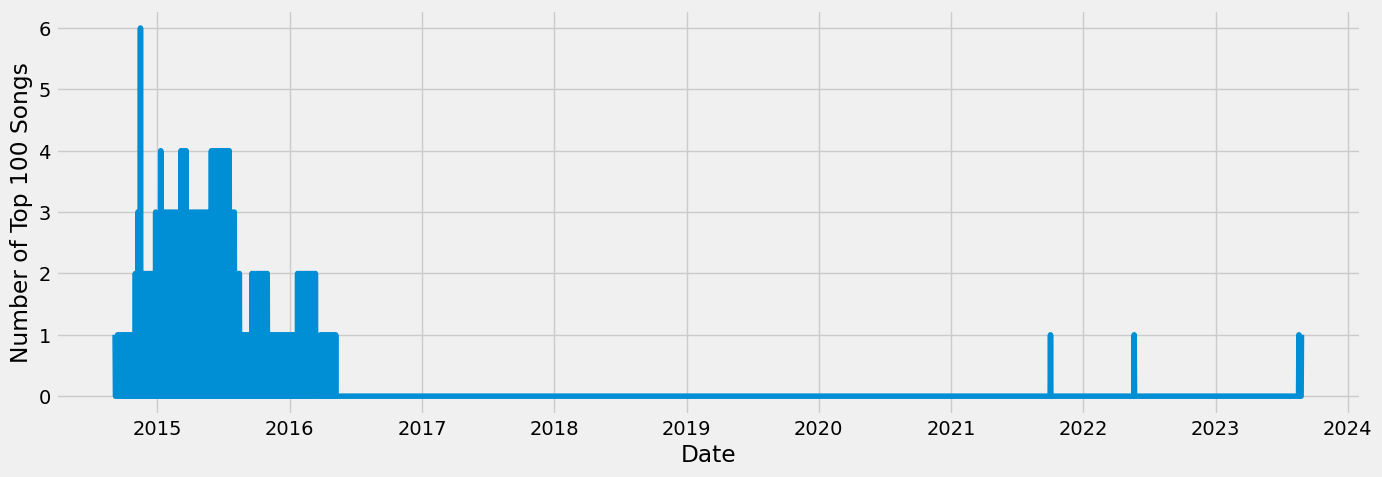

In [45]:
# Plot df

plt.figure(figsize=(15,5), dpi=100)

# Plot the data
plt.plot(df4['chart_week'], df4['count_hit_songs'])

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Number of Top 100 Songs')

# Show the plot
plt.show()

### Choosing a focus for time, within a  certain period of dates

In [46]:
# See when starts to flatten out

flatten = df4[df4['count_hit_songs'] == 0]

In [47]:
flatten2= df4[df4['chart_week'] >'2014-10-10']

In [48]:
flatten2.head(30)

,chart_week,count_hit_songs
35,2014-10-11,1
36,2014-10-12,0
37,2014-10-13,0
38,2014-10-14,0
39,2014-10-15,0
40,2014-10-16,0
41,2014-10-17,0
42,2014-10-18,1
43,2014-10-19,0
44,2014-10-20,0


In [49]:
flatten3= flatten2[flatten2['chart_week'] >='2016-04-27']

In [50]:
flatten3.head(20)

,chart_week,count_hit_songs
599,2016-04-27,0
600,2016-04-28,0
601,2016-04-29,0
602,2016-04-30,1
603,2016-05-01,0
604,2016-05-02,0
605,2016-05-03,0
606,2016-05-04,0
607,2016-05-05,0
608,2016-05-06,0


In [51]:
flatten3_dup = flatten3.duplicated()
flatten3_dup.sum()

0

In [52]:
flatten3.shape

(2678, 2)

In [53]:
# Final range for time series data
# October 10th, 2014 through April 27th, 2016

data = df4[(df4['chart_week'] > '2014-10-10') & (df4['chart_week'] < '2016-04-27')]

In [54]:
data.shape

(564, 2)

In [55]:
data.head(10)

,chart_week,count_hit_songs
35,2014-10-11,1
36,2014-10-12,0
37,2014-10-13,0
38,2014-10-14,0
39,2014-10-15,0
40,2014-10-16,0
41,2014-10-17,0
42,2014-10-18,1
43,2014-10-19,0
44,2014-10-20,0


In [56]:
data.tail(10)

,chart_week,count_hit_songs
589,2016-04-17,0
590,2016-04-18,0
591,2016-04-19,0
592,2016-04-20,0
593,2016-04-21,0
594,2016-04-22,0
595,2016-04-23,1
596,2016-04-24,0
597,2016-04-25,0
598,2016-04-26,0


In [57]:
data.isnull().sum()

chart_week         0
count_hit_songs    0
dtype: int64

In [58]:
data.dtypes

chart_week         datetime64[ns]
count_hit_songs             int32
dtype: object

In [59]:
data_dup = data.duplicated()

In [60]:
data_dup.sum()

0

In [61]:
# Set the "Date" column as the index

from datetime import datetime

data['datetime'] = pd.to_datetime(data['chart_week']) 
data = data.set_index('datetime') # Set the datetime as the index of the dataframe.
data.drop(['chart_week'], axis=1, inplace=True) # Drop the chart week column
data.head()

,count_hit_songs
datetime,
2014-10-11,1
2014-10-12,0
2014-10-13,0
2014-10-14,0
2014-10-15,0


In [62]:
data.tail()

,count_hit_songs
datetime,
2016-04-22,0
2016-04-23,1
2016-04-24,0
2016-04-25,0
2016-04-26,0


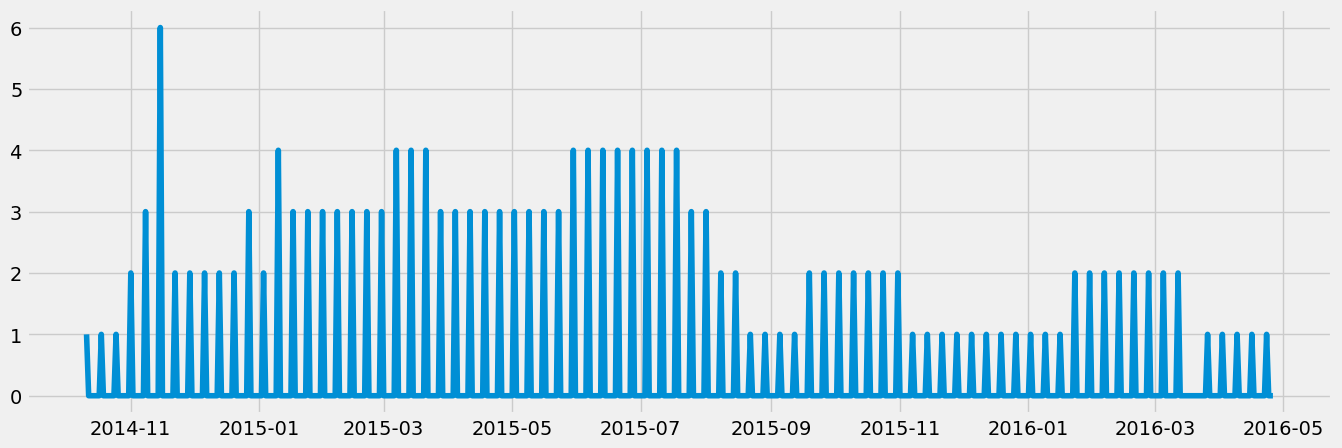

In [63]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data)

In [64]:
# Check for missing values 

data.isnull().sum() 

count_hit_songs    0
dtype: int64

# 03. Decomposition

In [65]:
# Decompose time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data, model='additive')

In [66]:
# define a fixed size for all special charts

from pylab import rcParams 

rcParams['figure.figsize'] = 18, 7

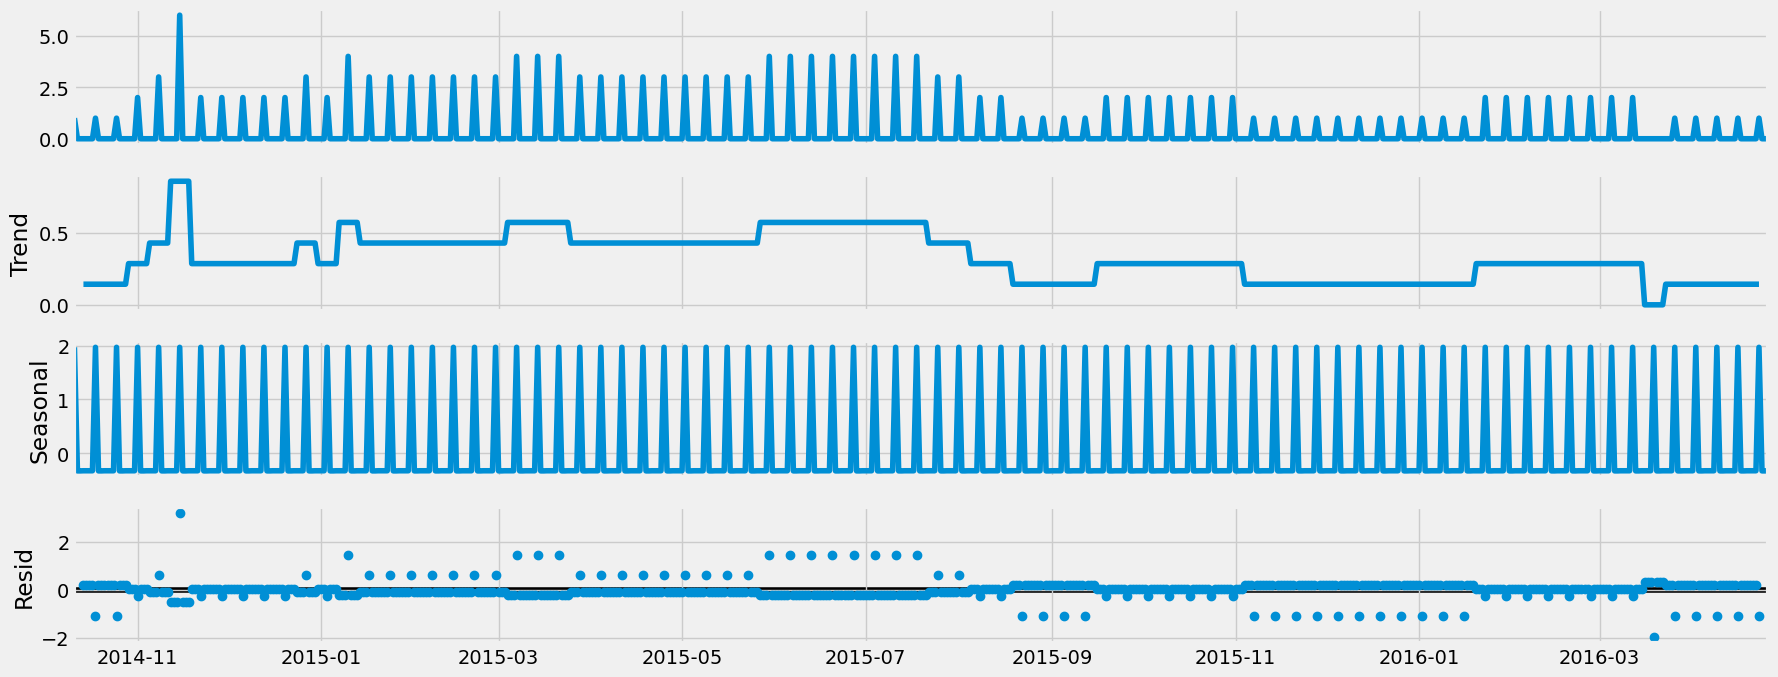

In [67]:
# Plot the separate components

decomp_1989 = decomposition.plot()
plt.show()

In [68]:
# Export heatmap viz

decomp_1989.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations',  'Dashboard Python Visuals', 'decomp_1989.png'))

Observations:
- The dominant trend line shows seems to match the data itself
- There is seasonality to this data
- There is unexplained noise leftover after the trend. From 2014-2015, the noise is positive. From 2015 onwards the noise is negative. 

# 4. Testing for stationarity

In [69]:
# Define and run the Dickey Fuller test

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data['count_hit_songs'])

Dickey-Fuller Stationarity test:
Test Statistic                  -2.359091
p-value                          0.153617
Number of Lags Used             13.000000
Number of Observations Used    550.000000
Critical Value (1%)             -3.442296
Critical Value (5%)             -2.866809
Critical Value (10%)            -2.569576
dtype: float64


Observations:

- A test statistic greater than the critical value means cannot reject null

- A test stat less than the critical value means can reject the null

- My test statistic is -2.359, which is greater than the -2.569 critical value at 10%

- The p-value not under 0.05, but rather is 0.154
This means that I cannot reject the null hypothsesis and does not support the hypothesis that this data is stationary

## Will also check for autocorrelation (prior to stationarizing the data)

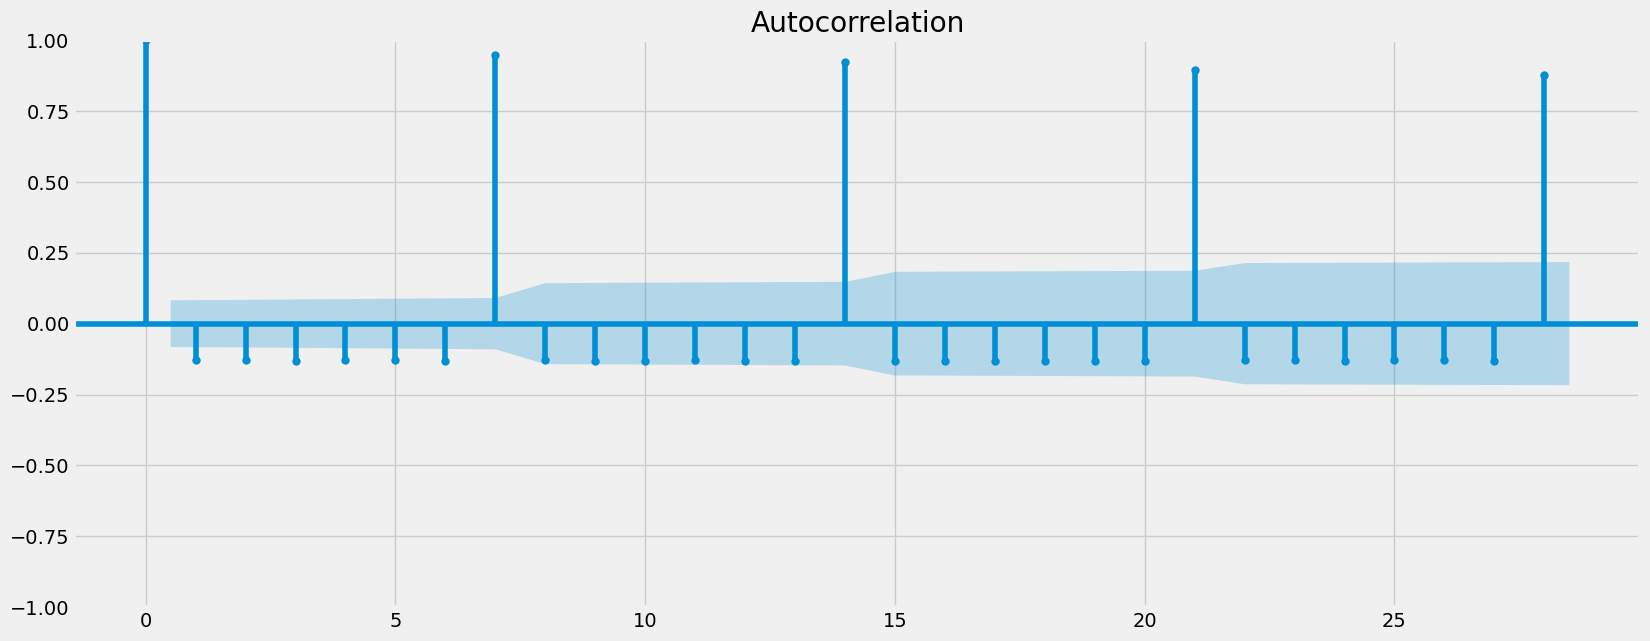

In [70]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(data)
plt.show()

The data has 5 lines that are widely outside the confidence interval. There are also 6 lines slightly outside the interval. These lines mean that lags are significantly correlating with each other. Need to reduce data to non-stationary.

# 5. Stationarizing the 1989 Album Hot 100 Songs Data

In [71]:
# The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

data_diff = data- data.shift(1) 

In [72]:
# Remove the missing values that came about as a result of the differencing.
# Allows to run the Dickey-Fuller test.

data_diff.dropna(inplace=True)

In [73]:
data_diff.head(20)

,count_hit_songs
datetime,
2014-10-12,-1.0
2014-10-13,0.0
2014-10-14,0.0
2014-10-15,0.0
2014-10-16,0.0
2014-10-17,0.0
2014-10-18,1.0
2014-10-19,-1.0
2014-10-20,0.0


In [74]:
data_diff.columns

Index(['count_hit_songs'], dtype='object')

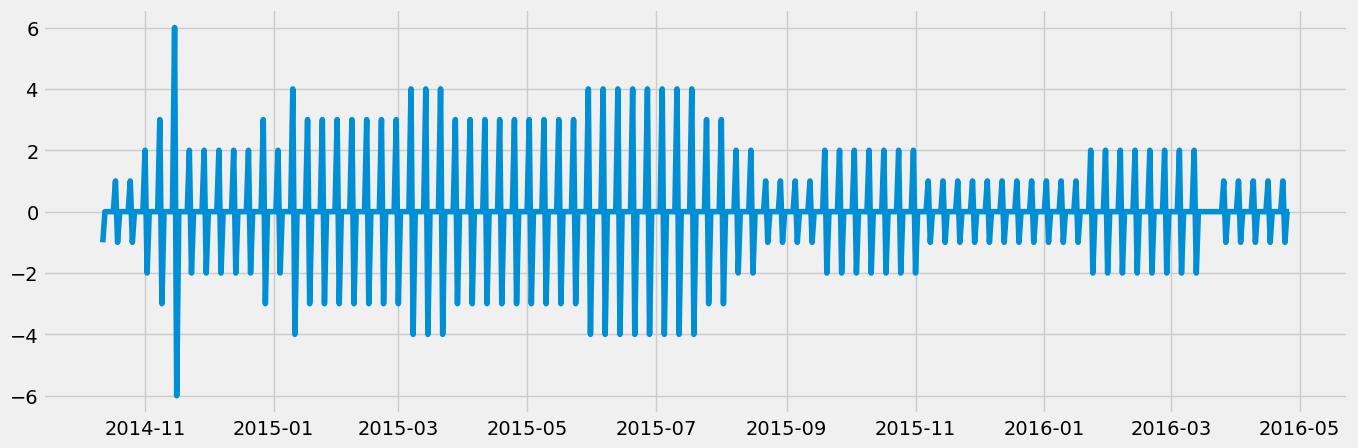

In [75]:
# Examine what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [76]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -1.198127e+01
p-value                        3.700080e-22
Number of Lags Used            1.200000e+01
Number of Observations Used    5.500000e+02
Critical Value (1%)           -3.442296e+00
Critical Value (5%)           -2.866809e+00
Critical Value (10%)          -2.569576e+00
dtype: float64


Observations: After Stationarizing the time series data using the Differencing method->
- The test statistic is now smaller than the critical value at the 1% signficance level 
- The p=value is less than 0.05
- Therefore I can reject the null hypothesis

Now I can consider the data series stationary.

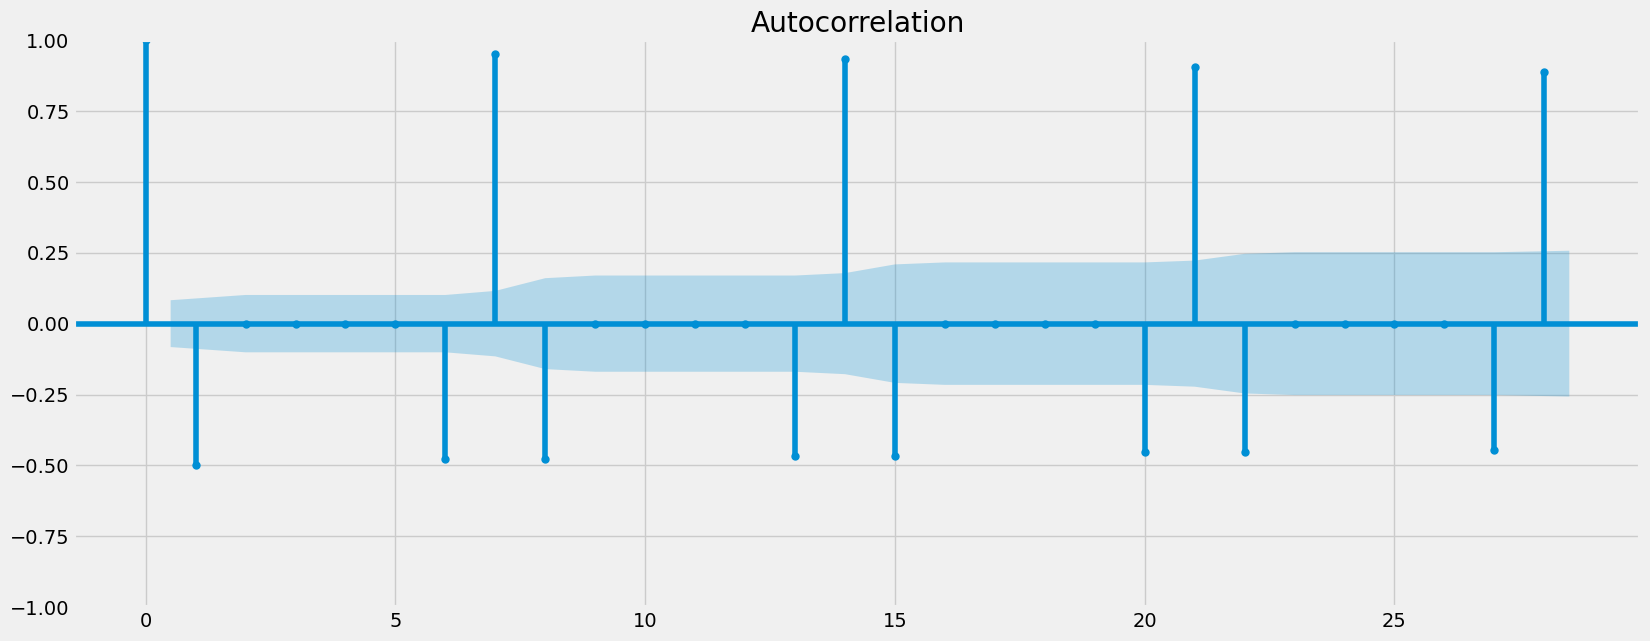

In [77]:
# Check for autocorrelation with stationary data

plot_acf(data_diff)
plt.show()

In [78]:
data_diff.shape

(563, 1)

### The autocorrelation figures were better prior to the differencing. There is the same number of lags, but the lags show more variation from the confidence interval.

In [79]:
# Conduct another round of differencing

data_diff_2 = data_diff- data_diff.shift(1) 

In [80]:
# Remove the missing values that came about as a result of the differencing.
# Allows to run the Dickey-Fuller test.

data_diff_2.dropna(inplace=True)

In [81]:
data_diff_2.head()

,count_hit_songs
datetime,
2014-10-13,1.0
2014-10-14,0.0
2014-10-15,0.0
2014-10-16,0.0
2014-10-17,0.0


In [82]:
data_diff_2['count_hit_songs'].value_counts(dropna=False)

count_hit_songs
 0.0     324
 2.0      48
 1.0      45
 3.0      40
-4.0      24
 4.0      24
-2.0      22
-6.0      20
-8.0      12
 6.0       2
-12.0      1
Name: count, dtype: int64

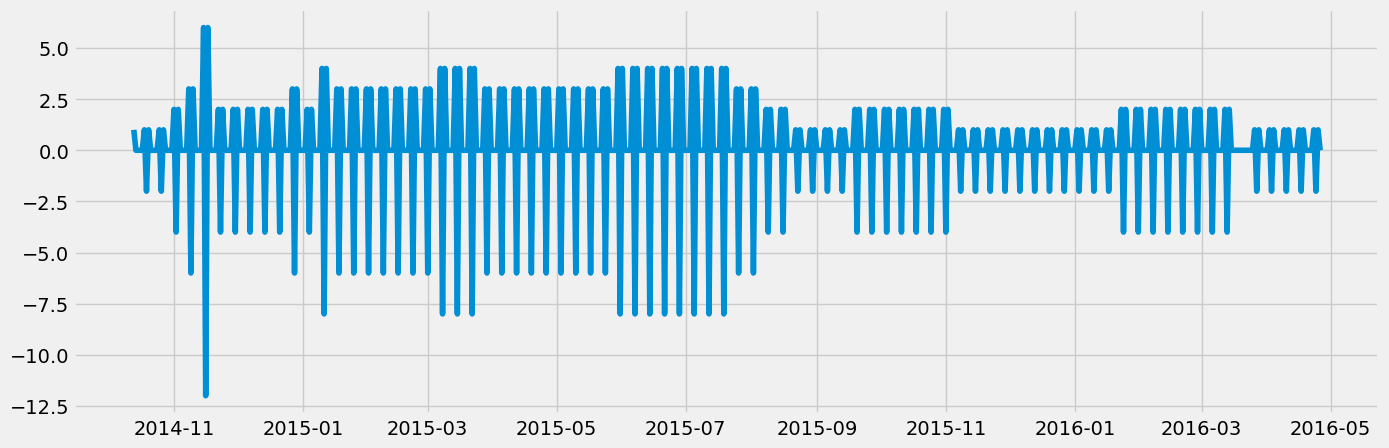

In [83]:
# Examine what the second round of differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff_2)

In [84]:
dickey_fuller(data_diff_2)

Dickey-Fuller Stationarity test:
Test Statistic                -1.169946e+01
p-value                        1.581497e-21
Number of Lags Used            1.900000e+01
Number of Observations Used    5.420000e+02
Critical Value (1%)           -3.442473e+00
Critical Value (5%)           -2.866887e+00
Critical Value (10%)          -2.569618e+00
dtype: float64


Observations: After the second round of difference
- The test statistic is smaller than the critical value at the 1% signficance level 
- The p=value is less than 0.05
- I can stillreject the null hypothesis

I can consider the data series stationary, but will check for autocorrelation improvement

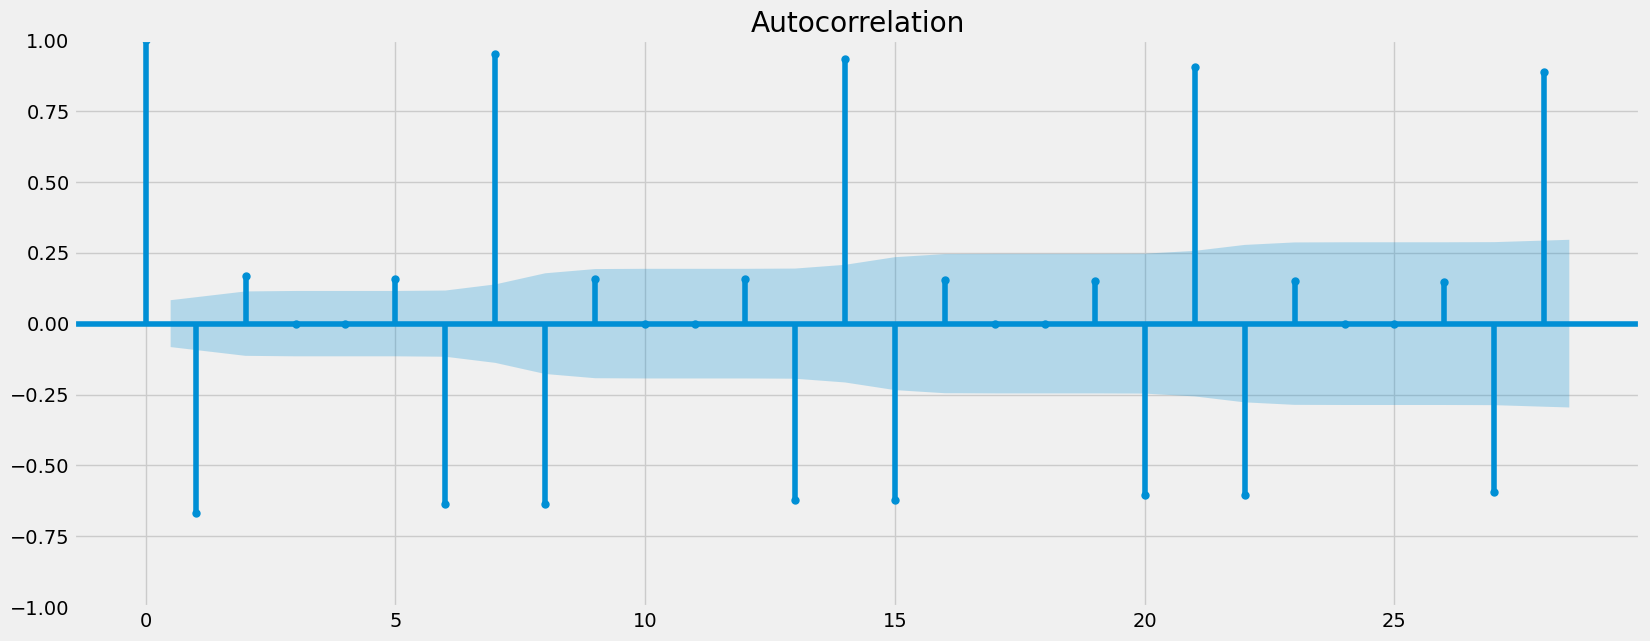

In [85]:
# Check for autocorrelation with stationary data

plot_acf(data_diff_2)
plt.show()

Differencing the second time made the autocorrelation results worse. Will utilize the first round and continue with autogressive components.

### 3rd round of differencing

In [86]:
# Conduct 3rd round of differencing

data_diff_3 = data_diff_2- data_diff_2.shift(1) 

In [87]:
# Remove the missing values that came about as a result of the differencing.
# Allows to run the Dickey-Fuller test.

data_diff_3.dropna(inplace=True)

In [88]:
# Conduct dickey fuller test to test for stationarity

dickey_fuller(data_diff_3)

Dickey-Fuller Stationarity test:
Test Statistic                -1.405798e+01
p-value                        3.092699e-26
Number of Lags Used            1.900000e+01
Number of Observations Used    5.410000e+02
Critical Value (1%)           -3.442495e+00
Critical Value (5%)           -2.866897e+00
Critical Value (10%)          -2.569623e+00
dtype: float64


Observations: After the second round of difference
- The test statistic is smaller than the critical value at the 1% signficance level 
- The p=value is less than 0.05
- I can still reject the null hypothesis

I can consider the data series stationary, but will check for autocorrelation improvement

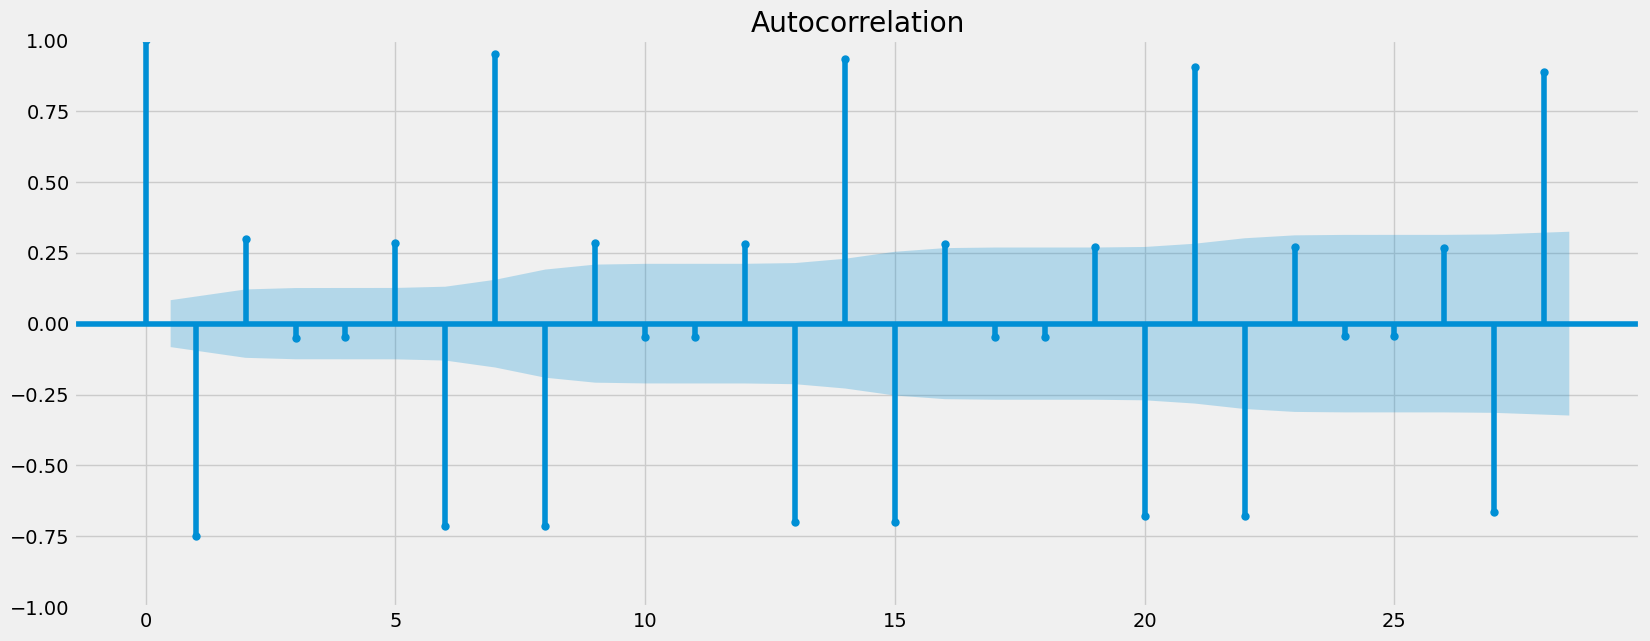

In [89]:
# Check for autocorrelation with stationary data

plot_acf(data_diff_3)
plt.show()

A third round of differencing resulted in an increase number of lags. This is not a good shift. I will return to the first differencing round to conduct time series forecasting.

# 06. Time Series Forecasting

In [90]:
# Review original decomposition plot prior to differencing

decomposition = sm.tsa.seasonal_decompose(data, model='additive')

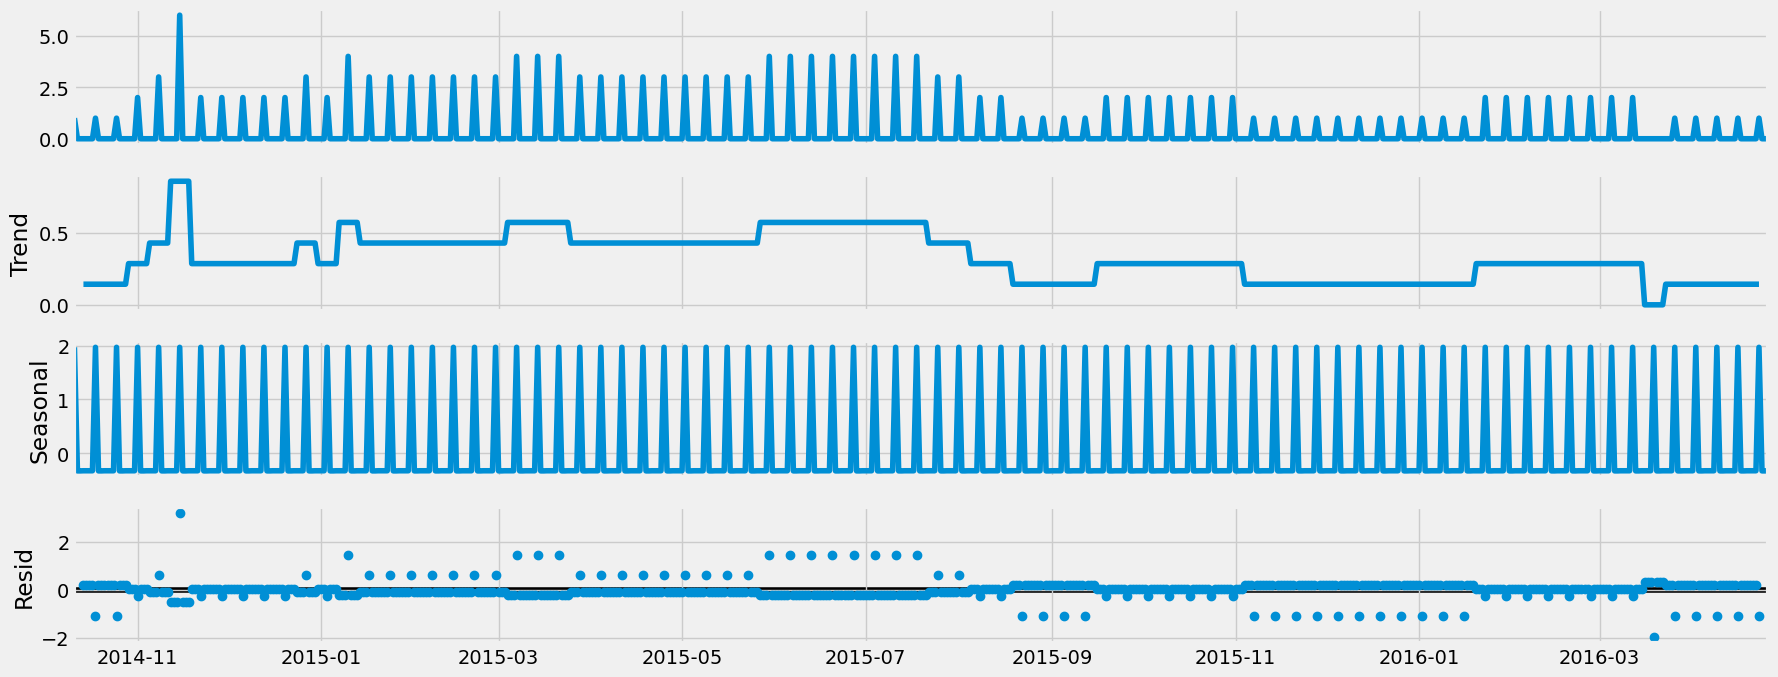

In [91]:
# Review decomposition

fig = decomposition.plot()
plt.show()

# Define parameters

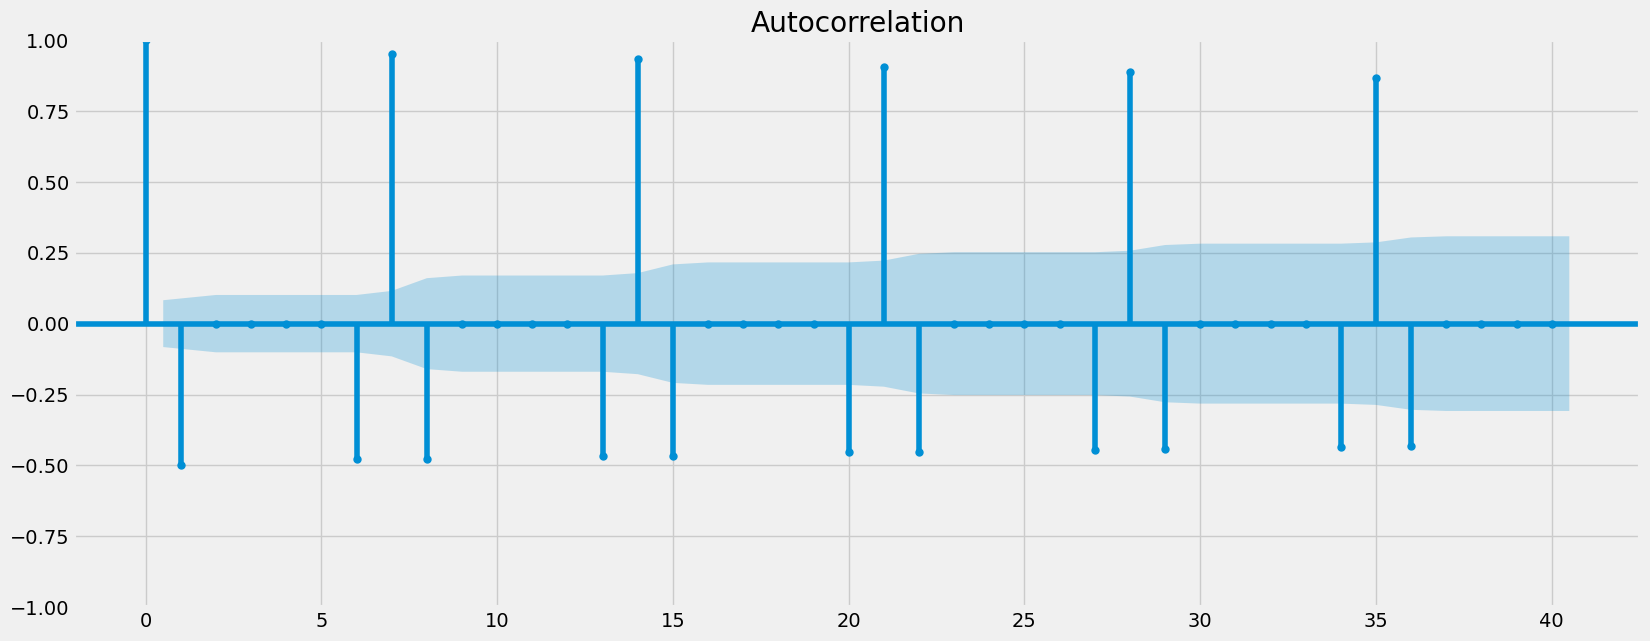

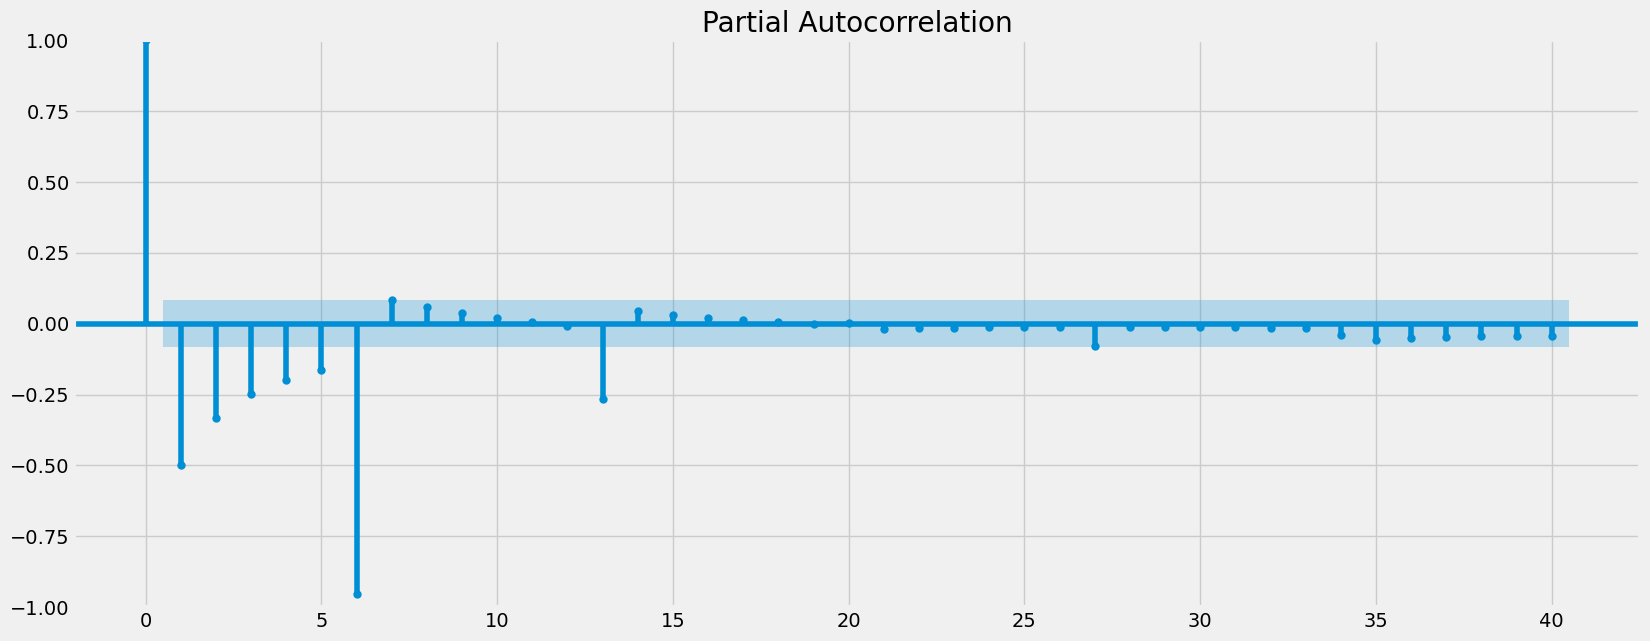

In [92]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF and PACF
plot_acf(data_diff['count_hit_songs'], lags=40)
plt.show()

plot_pacf(data_diff['count_hit_songs'], lags=40)
plt.show()

Plots help determine the autoregressive components. 
- p value of 17
- q value of 9
- differenced 1 time

## Splitting the data

In [93]:
data_diff.shape

(563, 1)

In [94]:
# Set the display option to show all rows
pd.set_option('display.max_rows', None)

In [95]:
data_diff.tail(100)

,count_hit_songs
datetime,
2016-01-18,0.0
2016-01-19,0.0
2016-01-20,0.0
2016-01-21,0.0
2016-01-22,0.0
2016-01-23,2.0
2016-01-24,-2.0
2016-01-25,0.0
2016-01-26,0.0


In [96]:
# identify point to include

index_value_to_print = '2016-01-18'
print("\nSpecific Index Value:")
print(data_diff.index.get_loc(index_value_to_print))


Specific Index Value:
463


In [97]:
# Split the data

train = data_diff['count_hit_songs'][:462]
test = data_diff['count_hit_songs'][462:]

In [98]:
data_diff.shape

(563, 1)

In [99]:
test.shape

(101,)

In [100]:
test.head()

datetime
2016-01-17   -1.0
2016-01-18    0.0
2016-01-19    0.0
2016-01-20    0.0
2016-01-21    0.0
Name: count_hit_songs, dtype: float64

In [101]:
train.shape

(462,)

In [102]:
train.head()

datetime
2014-10-12   -1.0
2014-10-13    0.0
2014-10-14    0.0
2014-10-15    0.0
2014-10-16    0.0
Name: count_hit_songs, dtype: float64

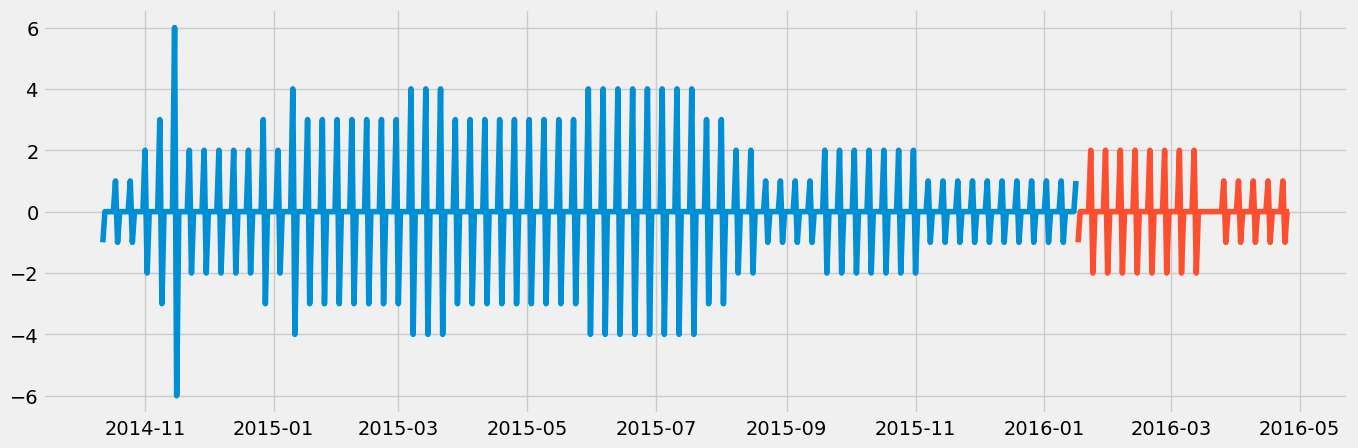

In [103]:
# Plot both sets in order to see the split

plt.figure(figsize=(15,5), dpi=100)
plt.plot(train)
plt.plot(test)

## Running and Fitting the Model

In [104]:
from statsmodels.tsa.arima.model import ARIMA

# Create and fit the ARIMA model
model = ARIMA(train, order=(17, 1, 9))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        count_hit_songs   No. Observations:                  462
Model:                ARIMA(17, 1, 9)   Log Likelihood                -113.705
Date:                Tue, 30 Jan 2024   AIC                            281.410
Time:                        00:32:11   BIC                            393.012
Sample:                    10-12-2014   HQIC                           325.352
                         - 01-16-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3760      1.726      0.218      0.828      -3.007       3.759
ar.L2         -0.6790      0.736     -0.923      0.356      -2.121       0.763
ar.L3         -0.2522      1.643     -0.153      0.878      -3.473       2.968
ar.L4         -0.1567      1.736     -0.090      0.928      -3.559       3.245
ar.L5         -0.8354      1.451     -0.576      0.565      -3.678       2.007
ar.L6          0.3196      2.473      0.129      0.897      -4.527       5.166
ar.L7         -0.0912      1.303     -0.070      0.944      -2.645       2.462
ar.L8         -0.7995      1.031     -0.775      0.438      -2.821       1.222
ar.L9          0.3043      2.037      0.149      0.881      -3.689       4.297
ar.L10        -0.2197      1.034     -0.212      0.832      -2.246       1.807
ar.L11        -0.2651      1.079     -0.246      0.806      -2.381       1.851
ar.L12         0.4018      1.365      0.294      0.768      -2.273       3.076
ar.L13        -0.7526      0.318     -2.368      0.018      -1.375      -0.130
ar.L14         0.6377      1.512      0.422      0.673      -2.326       3.601
ar.L15        -0.0248      0.191     -0.130      0.897      -0.400       0.350
ar.L16        -0.0464      0.173     -0.268      0.788      -0.385       0.292
ar.L17         0.0167      0.218      0.077      0.939      -0.410       0.444
ma.L1         -2.3537      1.723     -1.366      0.172      -5.731       1.024
ma.L2          2.4263      2.702      0.898      0.369      -2.870       7.723
ma.L3         -1.5256      2.245     -0.679      0.497      -5.926       2.875
ma.L4          0.4206      2.237      0.188      0.851      -3.964       4.806
ma.L5          0.6472      2.164      0.299      0.765      -3.594       4.888
ma.L6         -1.7765      2.108     -0.843      0.399      -5.908       2.355
ma.L7          2.5707      2.713      0.947      0.343      -2.747       7.889
ma.L8         -2.0645      2.858     -0.722      0.470      -7.666       3.537
ma.L9          0.6593      1.431      0.461      0.645      -2.146       3.465
sigma2         0.0854      0.028      3.087      0.002       0.031       0.140
===================================================================================
Ljung-Box (L1) (Q):                   0.60   Jarque-Bera (JB):            133860.33
Prob(Q):                              0.44   Prob(JB):                         0.00
Heteroskedasticity (H):               0.09   Skew:                            -1.81
Prob(H) (two-sided):                  0.00   Kurtosis:                        86.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

                               SARIMAX Results                                
Dep. Variable:        count_hit_songs   No. Observations:                  462
Model:                ARIMA(17, 1, 9)   Log Likelihood                -113.705
Date:                Tue, 30 Jan 2024   AIC                            281.410
Time:                        00:32:19   BIC                            393.012
Sample:                    10-12-2014   HQIC                           325.352
                         - 01-16-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3760      1.726      0.218      0.828      -3.007       3.759
ar.L2         -0.6790      0.736     -0.923      0.356      -2.121       0.763
ar.L3         -0.2522      1.643     -0.153      0.8

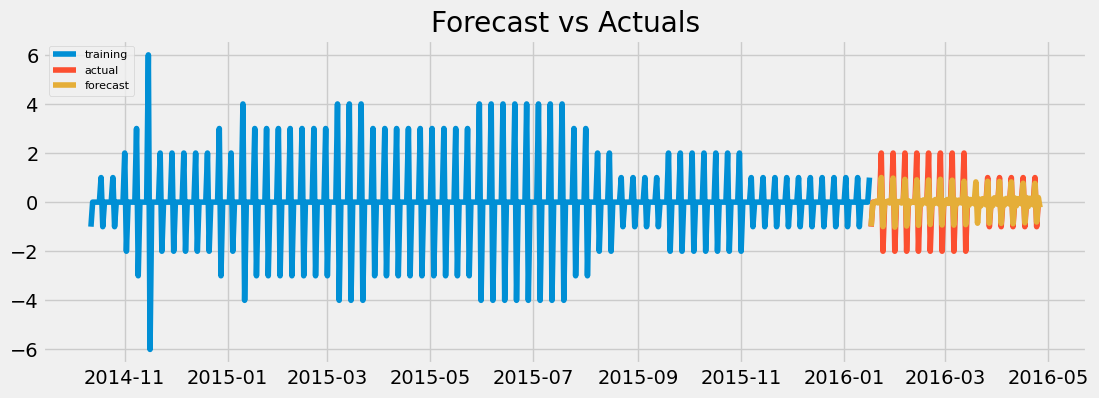

In [105]:
model = ARIMA(train, order=(17, 1, 9))  
fitted = model.fit()
print(fitted.summary())

# Forecast
forecast_steps = len(test)
fc = fitted.forecast(steps=forecast_steps, alpha=0.05)  # Forecasted values

# Compute standard errors
se = np.sqrt(fitted.forecast(steps=forecast_steps, alpha=0.05)[1])  # Standard errors

# Compute confidence interval
conf = 1.96 * se  # 95% confidence interval (for a two-sided interval)

# Create forecasted and confidence interval series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(fc - conf, index=test.index)
upper_series = pd.Series(fc + conf, index=test.index)

# Plot
plt.figure(figsize=(12, 4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

                               SARIMAX Results                                
Dep. Variable:        count_hit_songs   No. Observations:                  462
Model:                ARIMA(20, 1, 9)   Log Likelihood                -141.811
Date:                Tue, 30 Jan 2024   AIC                            343.621
Time:                        00:32:27   BIC                            467.623
Sample:                    10-12-2014   HQIC                           392.446
                         - 01-16-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1497      0.143     -1.049      0.294      -0.429       0.130
ar.L2         -0.2238      0.106     -2.109      0.035      -0.432      -0.016
ar.L3         -0.3189      0.100     -3.181      0.0

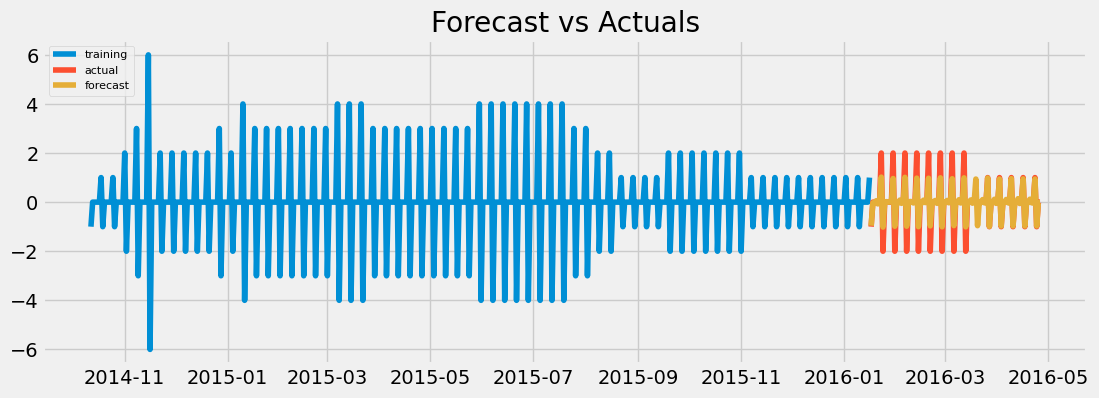

In [106]:
#iteration, changing p value to 20

model = ARIMA(train, order=(20, 1, 9))  
fitted = model.fit()
print(fitted.summary())

# Forecast
forecast_steps = len(test)
fc = fitted.forecast(steps=forecast_steps, alpha=0.05)  # Forecasted values

# Compute standard errors
se = np.sqrt(fitted.forecast(steps=forecast_steps, alpha=0.05)[1])  # Standard errors

# Compute confidence interval
conf = 1.96 * se  # 95% confidence interval (for a two-sided interval)

# Create forecasted and confidence interval series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(fc - conf, index=test.index)
upper_series = pd.Series(fc + conf, index=test.index)

# Plot
plt.figure(figsize=(12, 4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

Lead to closer confidence interval relation to actual values. Will increase p value again. 

                               SARIMAX Results                                
Dep. Variable:        count_hit_songs   No. Observations:                  462
Model:                ARIMA(22, 1, 9)   Log Likelihood                -109.931
Date:                Tue, 30 Jan 2024   AIC                            283.862
Time:                        00:36:57   BIC                            416.130
Sample:                    10-12-2014   HQIC                           335.942
                         - 01-16-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4701      1.081     -0.435      0.664      -2.590       1.650
ar.L2         -0.5498      1.449     -0.380      0.704      -3.389       2.289
ar.L3         -0.5070      1.978     -0.256      0.7

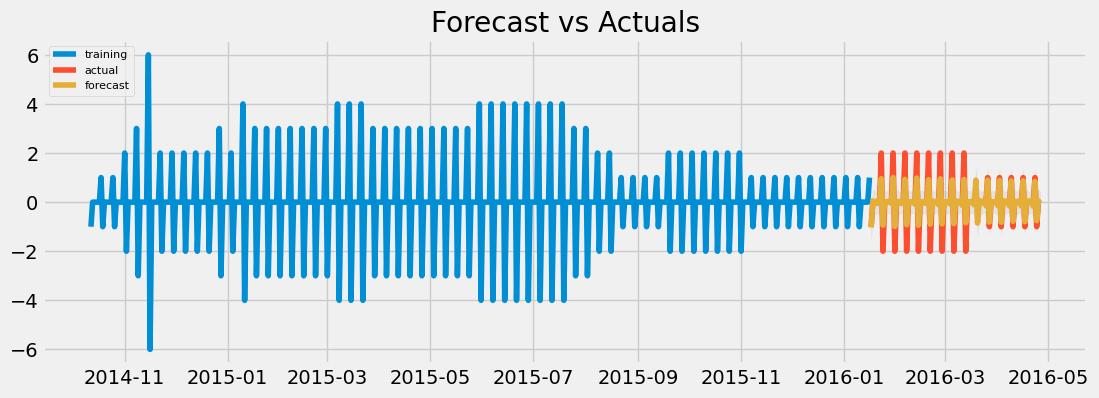

In [108]:
#iteration, changing p value to 22

model = ARIMA(train, order=(22, 1, 9))  
fitted = model.fit()
print(fitted.summary())

# Forecast
forecast_steps = len(test)
fc = fitted.forecast(steps=forecast_steps, alpha=0.05)  # Forecasted values

# Compute standard errors
se = np.sqrt(fitted.forecast(steps=forecast_steps, alpha=0.05)[1])  # Standard errors

# Compute confidence interval
conf = 1.96 * se  # 95% confidence interval (for a two-sided interval)

# Create forecasted and confidence interval series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(fc - conf, index=test.index)
upper_series = pd.Series(fc + conf, index=test.index)

# Plot
plt.figure(figsize=(12, 4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

                               SARIMAX Results                                
Dep. Variable:        count_hit_songs   No. Observations:                  462
Model:               ARIMA(20, 1, 12)   Log Likelihood                -143.149
Date:                Tue, 30 Jan 2024   AIC                            352.298
Time:                        00:38:15   BIC                            488.700
Sample:                    10-12-2014   HQIC                           406.006
                         - 01-16-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3770      0.120     -3.144      0.002      -0.612      -0.142
ar.L2         -0.3547      0.133     -2.658      0.008      -0.616      -0.093
ar.L3         -0.1068      0.172     -0.621      0.5

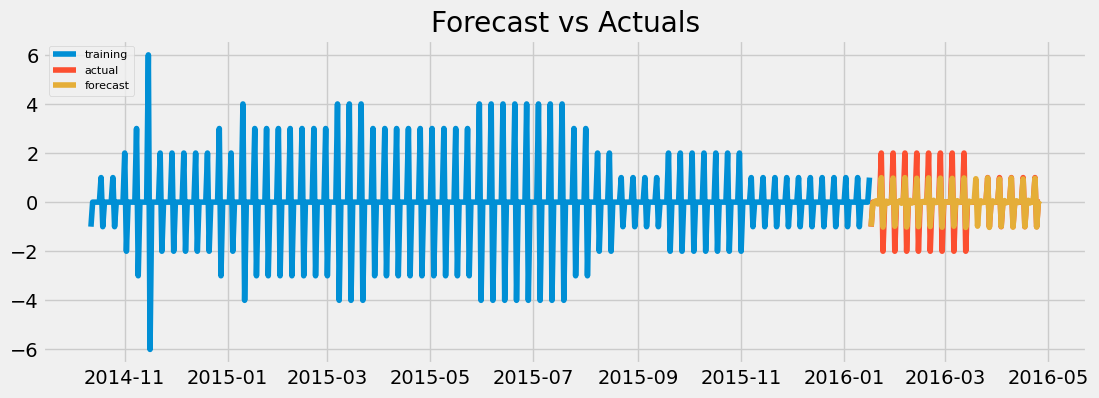

In [109]:
# Last iteration was ineffective. 
# Changing q value to see effect

model = ARIMA(train, order=(20, 1, 12))  
fitted = model.fit()
print(fitted.summary())

# Forecast
forecast_steps = len(test)
fc = fitted.forecast(steps=forecast_steps, alpha=0.05)  # Forecasted values

# Compute standard errors
se = np.sqrt(fitted.forecast(steps=forecast_steps, alpha=0.05)[1])  # Standard errors

# Compute confidence interval
conf = 1.96 * se  # 95% confidence interval (for a two-sided interval)

# Create forecasted and confidence interval series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(fc - conf, index=test.index)
upper_series = pd.Series(fc + conf, index=test.index)

# Plot
plt.figure(figsize=(12, 4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

                               SARIMAX Results                                
Dep. Variable:        count_hit_songs   No. Observations:                  462
Model:               ARIMA(20, 1, 15)   Log Likelihood                 -83.742
Date:                Tue, 30 Jan 2024   AIC                            239.484
Time:                        00:39:02   BIC                            388.286
Sample:                    10-12-2014   HQIC                           298.074
                         - 01-16-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -2.0217     14.667     -0.138      0.890     -30.769      26.726
ar.L2         -3.0350     27.619     -0.110      0.912     -57.168      51.098
ar.L3         -4.0183     40.809     -0.098      0.9

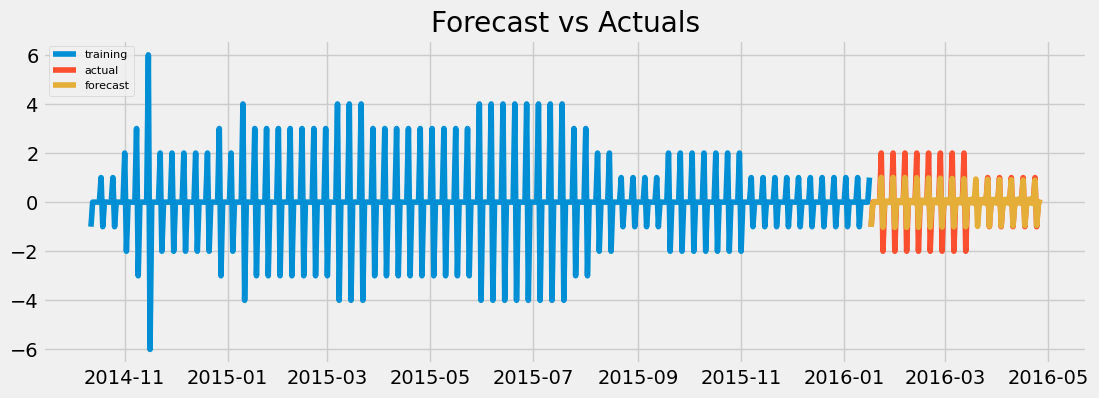

In [110]:
# Slightly better, will continue to increase q

model = ARIMA(train, order=(20, 1, 15))  
fitted = model.fit()
print(fitted.summary())

# Forecast
forecast_steps = len(test)
fc = fitted.forecast(steps=forecast_steps, alpha=0.05)  # Forecasted values

# Compute standard errors
se = np.sqrt(fitted.forecast(steps=forecast_steps, alpha=0.05)[1])  # Standard errors

# Compute confidence interval
conf = 1.96 * se  # 95% confidence interval (for a two-sided interval)

# Create forecasted and confidence interval series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(fc - conf, index=test.index)
upper_series = pd.Series(fc + conf, index=test.index)

# Plot
plt.figure(figsize=(12, 4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

p Values went way up, not statistically significant. Reducing q value again to improve coefficients

                               SARIMAX Results                                
Dep. Variable:        count_hit_songs   No. Observations:                  462
Model:               ARIMA(20, 1, 11)   Log Likelihood                -141.295
Date:                Tue, 30 Jan 2024   AIC                            346.590
Time:                        00:48:20   BIC                            478.859
Sample:                    10-12-2014   HQIC                           398.670
                         - 01-16-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3551      0.113     -3.142      0.002      -0.577      -0.134
ar.L2         -0.4253      0.135     -3.151      0.002      -0.690      -0.161
ar.L3         -0.1763      0.160     -1.099      0.2

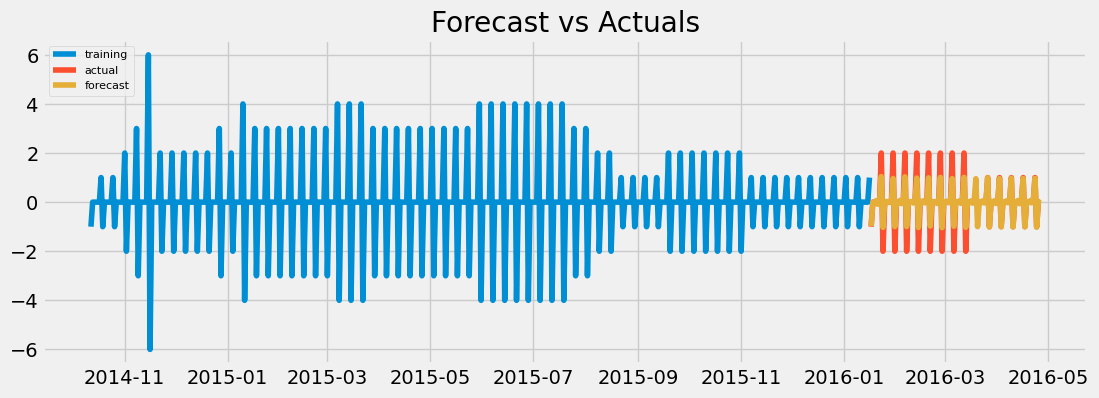

In [113]:
# Last iteration was ineffective. 
# Changing q value to see effect

model = ARIMA(train, order=(20, 1, 11))  
fitted = model.fit()
print(fitted.summary())

# Forecast
forecast_steps = len(test)
fc = fitted.forecast(steps=forecast_steps, alpha=0.05)  # Forecasted values

# Compute standard errors
se = np.sqrt(fitted.forecast(steps=forecast_steps, alpha=0.05)[1])  # Standard errors

# Compute confidence interval
conf = 1.96 * se  # 95% confidence interval (for a two-sided interval)

# Create forecasted and confidence interval series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(fc - conf, index=test.index)
upper_series = pd.Series(fc + conf, index=test.index)

# Plot
plt.figure(figsize=(12, 4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

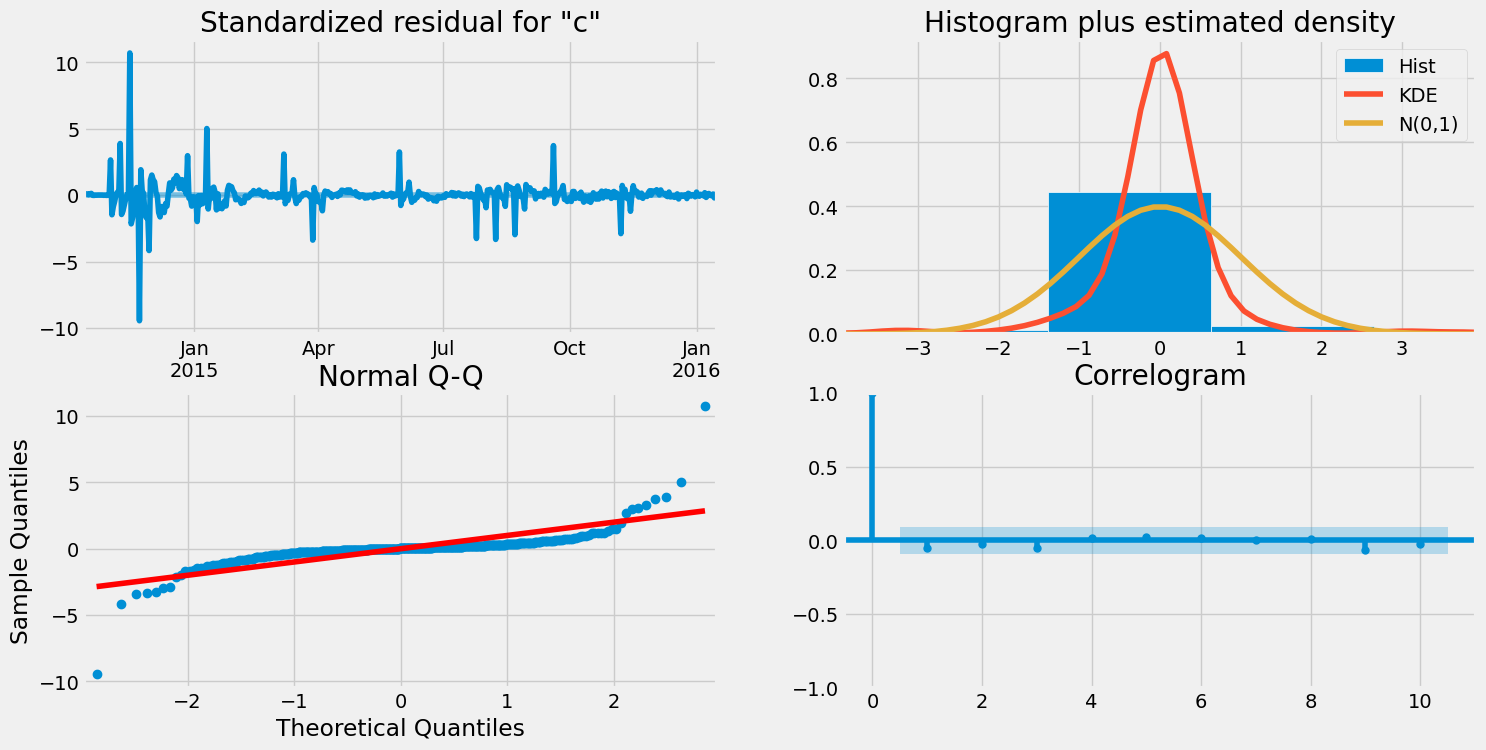

In [115]:
fitted.plot_diagnostics(figsize=(16,8))
plt.show()

The model diagnostics suggest that the model residuals do not have an exact normal distritbution. There is also a higher amount of positive and negative residuals early on, near November 2014. This is a spike directly after the 1989 album came out. This is further emphasize when viewing overall Hot 100 Chart time series data, which shows a large upwards spike during this period. 
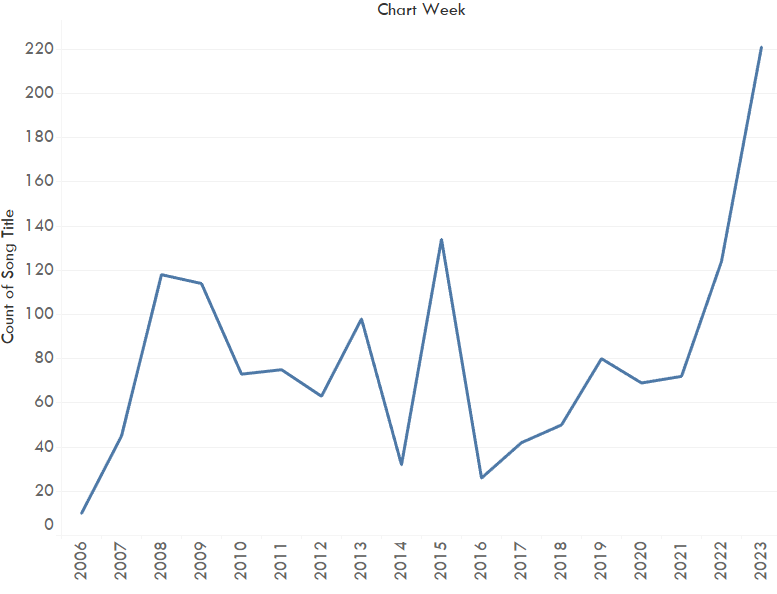

Decision to end forecasting process, as the 1989 Album data set does not allign with forecasting requirements.